In [1]:
from splikes import *

Plasticnet version  0.1.0
Splikes version  0.1.0


In [13]:
from pylab import figure,legend,plot,linspace

<img src="./images/epsp1.png">

Input Rate: $\rho$

Equation for Unsmoothed:

\begin{eqnarray}
u&\rightarrow& u+a\cdot w_i \mbox{ (input spike on input $i$)}\\
\frac{du}{dt}&=& -u/\tau
\end{eqnarray}

Average value:
\begin{eqnarray}
<u> = a\cdot w\cdot \tau\cdot \rho
\end{eqnarray}

Equation for Smoothed:

\begin{eqnarray}
v&\rightarrow& v+a\cdot w_i \mbox{ (input spike on input $i$)}\\
\frac{dv}{dt}&=& -v/\tau\\
\frac{du}{dt}&=& (v-u)/\tau
\end{eqnarray}

Average value:
\begin{eqnarray}
<u> = a\cdot w\cdot \tau\cdot \rho
\end{eqnarray}


('Time Elapsed...', '0.00 s')


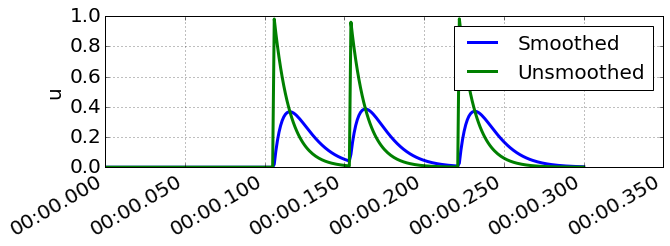

In [4]:
pre=neurons.poisson_pattern([10])

post=neurons.srm0(1)
post.smoothed=True
post.tau=0.01

post2=neurons.srm0(1)
post2.smoothed=False
post2.tau=0.01
post2.name='unsmoothed'

c=connection(pre,post,[1,1])
c2=connection(pre,post2,[1,1])

sim=simulation(.3,dt=0.0001)
sim.monitor(post,['u',],0.001)
sim.monitor(post2,['u',],0.001)

run_sim(sim,[pre,post,post2],[c,c2])

figure(figsize=(10,3))
m=sim.monitors['u']
m.plot()
m=sim.monitors['u [unsmoothed]']
m.plot()
legend(['Smoothed','Unsmoothed'])

('Time Elapsed...', '0.01 s')


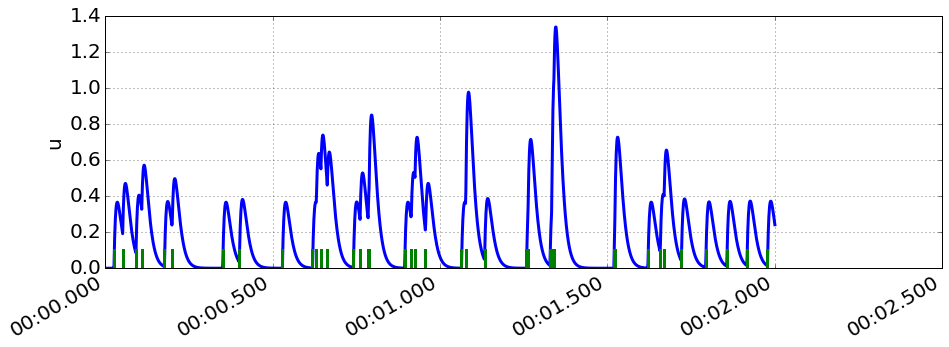

In [6]:
pre=neurons.poisson_pattern([20])
pre.save_spikes_begin=0.0
pre.save_spikes_end=10

post=neurons.srm0(1)
post.smoothed=True
post.tau=0.01

c=connection(pre,post,[1,1])

sim=simulation(2,dt=0.0001)
sim.monitor(post,['u',],0.001)

run_sim(sim,[pre,post],[c])

figure(figsize=(15,5))
m=sim.monitors['u']
m.plot()

for t,n in pre.saved_spikes:
    plot([t,t],[0,0.1],'g',linewidth=3)


In [7]:
pre.saved_spikes

[(0.0258999999999999, 0),
 (0.05190000000000046, 0),
 (0.0917000000000016, 0),
 (0.10890000000000209, 0),
 (0.17669999999999686, 0),
 (0.19969999999999433, 0),
 (0.3506999999999777, 0),
 (0.4003999999999722, 0),
 (0.5289999999999581, 0),
 (0.6189999999999481, 0),
 (0.6303999999999469, 0),
 (0.6440999999999454, 0),
 (0.6630999999999433, 0),
 (0.7410999999999347, 0),
 (0.7609999999999325, 0),
 (0.7848999999999299, 0),
 (0.7879999999999295, 0),
 (0.8941999999999178, 0),
 (0.9137999999999157, 0),
 (0.9249999999999144, 0),
 (0.956499999999911, 0),
 (1.0638999999998993, 0),
 (1.0763999999998979, 0),
 (1.0767999999998978, 0),
 (1.1328999999998917, 0),
 (1.2579999999998779, 0),
 (1.2624999999998774, 0),
 (1.3281999999998702, 0),
 (1.3329999999998696, 0),
 (1.3336999999998695, 0),
 (1.3400999999998688, 0),
 (1.5189999999998491, 0),
 (1.5214999999998489, 0),
 (1.620699999999838, 0),
 (1.6575999999998339, 0),
 (1.6691999999998326, 0),
 (1.720699999999827, 0),
 (1.793399999999819, 0),
 (1.85639999

('Time Elapsed...', '0.12 s')


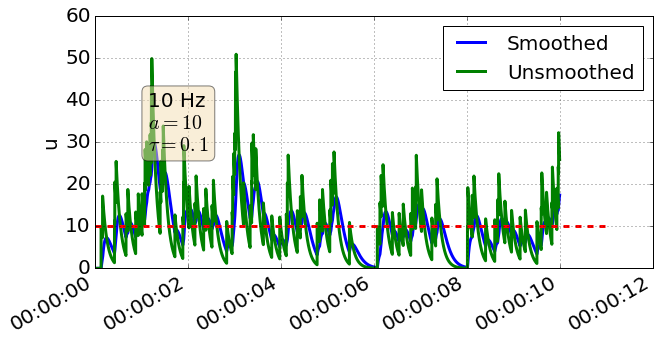

In [8]:
pre=neurons.poisson_pattern([10])

post=neurons.srm0(1)
post.smoothed=True
post.tau=0.1
post.a=10

post2=neurons.srm0(1)
post2.smoothed=False
post2.tau=0.1
post2.a=10
post2.name='unsmoothed'

c=connection(pre,post,[1,1])
c2=connection(pre,post2,[1,1])

sim=simulation(10,dt=0.0001)
sim.monitor(post,['u',],0.001)
sim.monitor(post2,['u',],0.001)

run_sim(sim,[pre,post,post2],[c,c2])

figure(figsize=(10,5))
m=sim.monitors['u']
m.plot()
m=sim.monitors['u [unsmoothed]']
m.plot()
legend(['Smoothed','Unsmoothed'])

plot([0,11],[10,10],'r--',linewidth=3)

paramtext(0.15,0.7,
          r'%d Hz' % (10),
          r'$a=%.f$' % (post2.a),
          r'$\tau=%.1f$'  % (post2.tau),
          )


### try with isi invgauss input

('Time Elapsed...', '0.15 s')


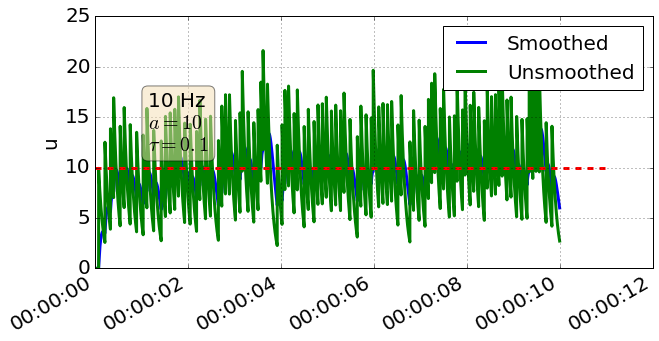

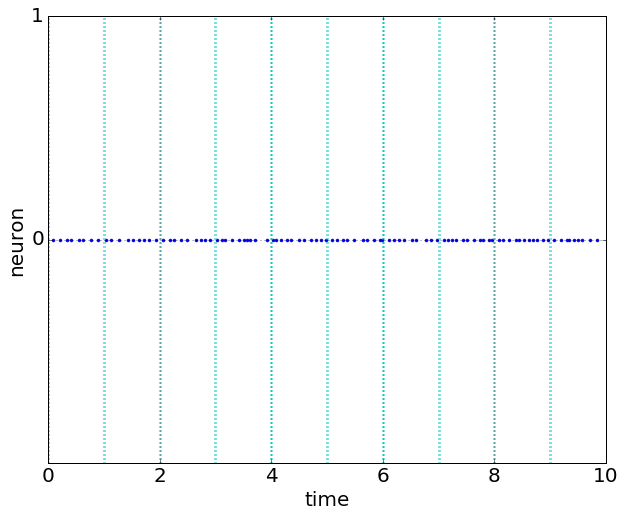

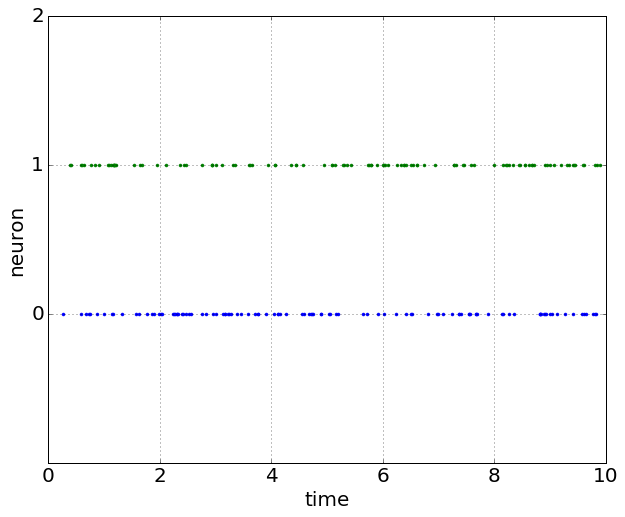

In [9]:
ISI=neurons.isi_distributions.invgauss(0,1.0)
pre=neurons.isi_pattern([10],ISI)
pre.time_between_patterns=1*second
pre.save_spikes_begin=0
pre.save_spikes_end=10

post=neurons.srm0(1)
post.smoothed=True
post.tau=0.1
post.a=10
post.save_spikes_begin=0
post.save_spikes_end=10

post2=neurons.srm0(1)
post2.smoothed=False
post2.tau=0.1
post2.a=10
post2.name='unsmoothed'
post2.save_spikes_begin=0
post2.save_spikes_end=10

c=connection(pre,post,[1,1])
c2=connection(pre,post2,[1,1])

sim=simulation(10,dt=0.0001)
sim.monitor(post,['u',],0.001)
sim.monitor(post2,['u',],0.001)

run_sim(sim,[pre,post,post2],[c,c2])

figure(figsize=(10,5))
m=sim.monitors['u']
m.plot()
m=sim.monitors['u [unsmoothed]']
m.plot()
legend(['Smoothed','Unsmoothed'])

plot([0,11],[10,10],'r--',linewidth=3)

paramtext(0.15,0.7,
          r'%d Hz' % (10),
          r'$a=%.f$' % (post2.a),
          r'$\tau=%.1f$'  % (post2.tau),
          )

figure()
pre.plot_spikes()

figure()
post.plot_spikes()
post2.plot_spikes(1)

('Time Elapsed...', '0.20 s')


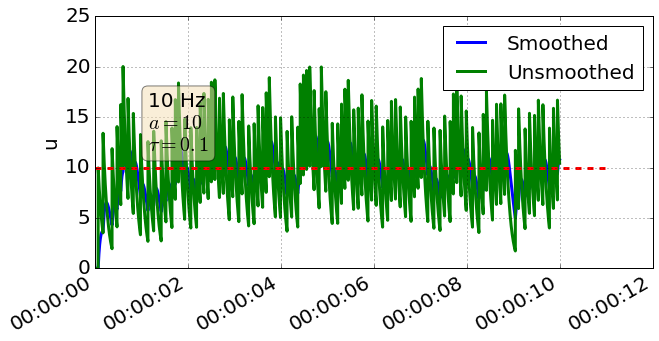

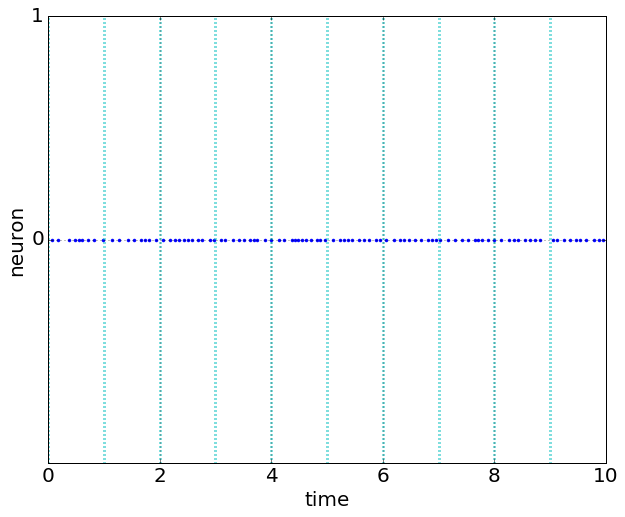

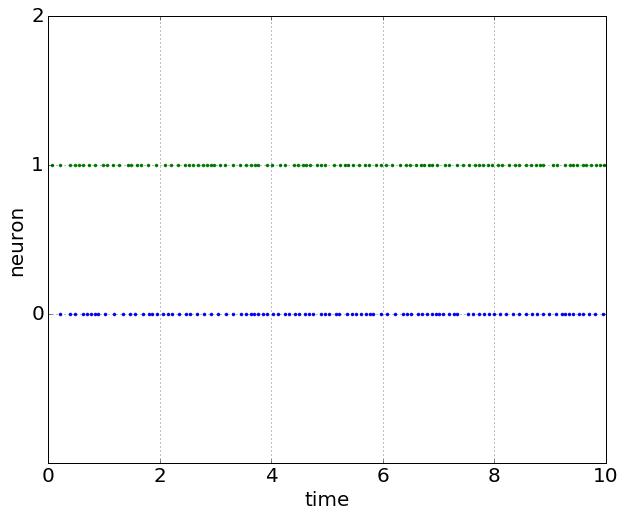

In [10]:
ISI=neurons.isi_distributions.invgauss(0,1.0)
pre=neurons.isi_pattern([10],ISI)
pre.time_between_patterns=1*second
pre.save_spikes_begin=0
pre.save_spikes_end=10

ISI2a=neurons.isi_distributions.invgauss(0,1.0)
ISI2b=neurons.isi_distributions.invgauss(0,1.0)

post=neurons.srm0_isi(1,ISI2a)
post.smoothed=True
post.tau=0.1
post.a=10
post.save_spikes_begin=0
post.save_spikes_end=10

post2=neurons.srm0_isi(1,ISI2b)
post2.smoothed=False
post2.tau=0.1
post2.a=10
post2.name='unsmoothed'
post2.save_spikes_begin=0
post2.save_spikes_end=10

c=connection(pre,post,[1,1])
c2=connection(pre,post2,[1,1])

sim=simulation(10,dt=0.0001)
sim.monitor(post,['u',],0.001)
sim.monitor(post2,['u',],0.001)

run_sim(sim,[pre,post,post2],[c,c2])

figure(figsize=(10,5))
m=sim.monitors['u']
m.plot()
m=sim.monitors['u [unsmoothed]']
m.plot()
legend(['Smoothed','Unsmoothed'])

plot([0,11],[10,10],'r--',linewidth=3)

paramtext(0.15,0.7,
          r'%d Hz' % (10),
          r'$a=%.f$' % (post2.a),
          r'$\tau=%.1f$'  % (post2.tau),
          )

figure()
pre.plot_spikes()

figure()
post.plot_spikes()
post2.plot_spikes(1)

In [11]:
c.weights

array([[ 1.]])

<img src="images/input_rate1.png">

In [15]:
from pylab import mean

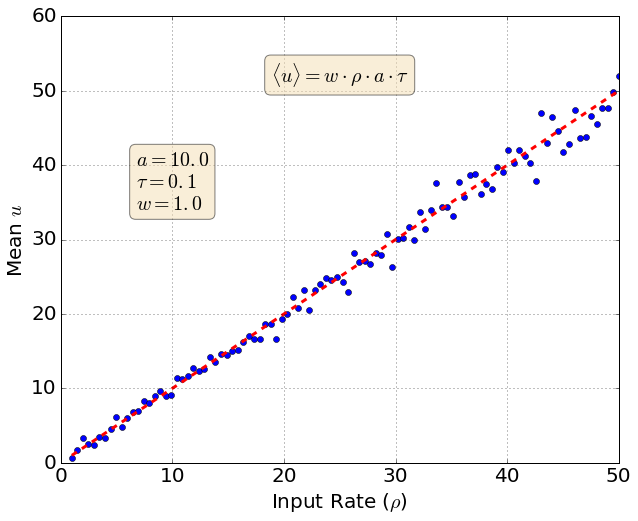

In [16]:
rate_arr=linspace(1,50,100)
#print rate_arr

mean_arr=[]
for rate in rate_arr:
    
    pre=neurons.poisson_pattern([rate])
    post=neurons.srm0(1)
    post.tau=0.1
    post.a=10.0
    
    c=connection(pre,post,[1,1])
    
    sim=simulation(10,dt=0.0001)
    sim.monitor(post,['u',],0.001)
    
    run_sim(sim,[pre,post],[c],print_time=False)
    
    u=sim.monitors['u'].array()
    mean_arr.append(mean(u))
    
plot(rate_arr,mean_arr,'o')
xlabel(r'Input Rate ($\rho$)')
ylabel('Mean $u$')

plot(rate_arr,rate_arr*post.a*post.tau,'r--')

paramtext(.2,.7,
          r'$a=%s$' % post.a,          
          r'$\tau=%s$' % post.tau,
          r'$w=%s$' % float(c.weights),
          )

paramtext(.5,.9,
          r'$\langle u \rangle = w\cdot \rho \cdot a \cdot \tau$')


<img src="images/weight_dependence1.png">

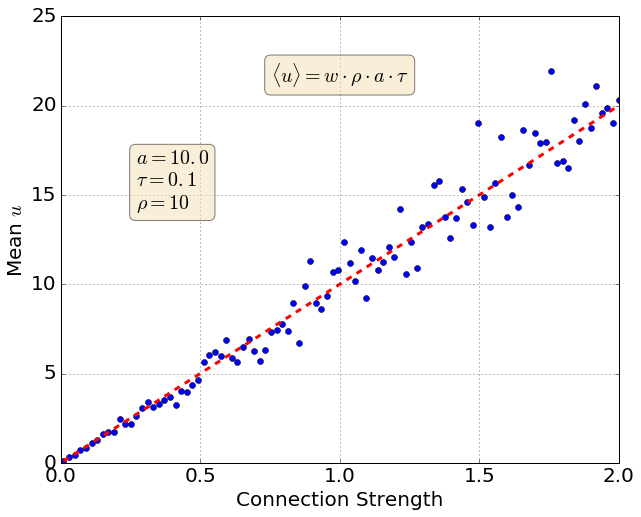

In [17]:
w_arr=linspace(0.01,2,100)
#print w_arr

mean_arr=[]
rate=10
for w in w_arr:
    
    pre=neurons.poisson_pattern([rate])
    post=neurons.srm0(1)
    post.tau=0.1
    post.a=10.0
    
    c=connection(pre,post,[w,w])
    
    sim=simulation(10,dt=0.0001)
    sim.monitor(post,['u',],0.001)
    
    run_sim(sim,[pre,post],[c],print_time=False)
    
    u=sim.monitors['u'].array()
    mean_arr.append(mean(u))
    
plot(w_arr,mean_arr,'o')
xlabel('Connection Strength')
ylabel('Mean $u$')

plot(w_arr,w_arr*rate*post.a*post.tau,'r--')

paramtext(.2,.7,
          r'$a=%s$' % post.a,          
          r'$\tau=%s$' % post.tau,
          r'$\rho=%s$' % rate,
          )

paramtext(.5,.9,
          r'$\langle u \rangle = w\cdot \rho \cdot a \cdot \tau$')
